In [1]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as pt
import numpy as np
(x_train, y_train), (x_test, y_test) = datasets.cifar10.load_data() 

170498071/170498071 [==============================] - 3s 0us/step


In [2]:
print(x_train.shape)
print(x_train.size)
print()
print(y_train.shape)
print(y_train.size)

(50000, 32, 32, 3)
153600000

(50000, 1)
50000


In [3]:
print(x_test.shape)
print(x_test.size)
print()
print(y_test.shape)
print(y_test.size)

(10000, 32, 32, 3)
30720000

(10000, 1)
10000


In [4]:
x_train


array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [5]:
y_train

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

In [6]:
y_train = y_train.reshape(-1,)
y_train

array([6, 9, 9, ..., 9, 1, 1], dtype=uint8)

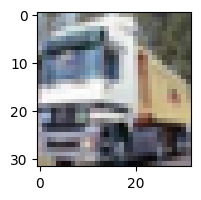

In [7]:
pt.figure(figsize = (10,2))
pt.imshow(x_train[1])

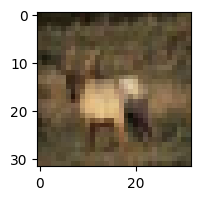

In [8]:
pt.figure(figsize = (10,2))
pt.imshow(x_train[3])

In [9]:
classes = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [10]:
classes[8]

'ship'

In [19]:
def plot_sample(x, y, index):
  pt.figure(figsize = (10,2))
  pt.imshow(x_train[index])
  pt.xlabel(classes[y[index]])

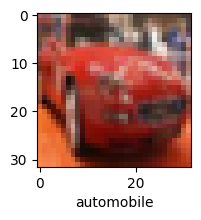

In [18]:
plot_sample(x_train, y_train, 5)

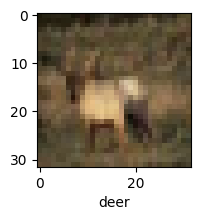

In [20]:
plot_sample(x_train, y_train, 3)

In [21]:
x_train

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [22]:
x_train = x_train / 255
x_test = x_test / 255

In [23]:
x_train

array([[[[0.23137255, 0.24313725, 0.24705882],
         [0.16862745, 0.18039216, 0.17647059],
         [0.19607843, 0.18823529, 0.16862745],
         ...,
         [0.61960784, 0.51764706, 0.42352941],
         [0.59607843, 0.49019608, 0.4       ],
         [0.58039216, 0.48627451, 0.40392157]],

        [[0.0627451 , 0.07843137, 0.07843137],
         [0.        , 0.        , 0.        ],
         [0.07058824, 0.03137255, 0.        ],
         ...,
         [0.48235294, 0.34509804, 0.21568627],
         [0.46666667, 0.3254902 , 0.19607843],
         [0.47843137, 0.34117647, 0.22352941]],

        [[0.09803922, 0.09411765, 0.08235294],
         [0.0627451 , 0.02745098, 0.        ],
         [0.19215686, 0.10588235, 0.03137255],
         ...,
         [0.4627451 , 0.32941176, 0.19607843],
         [0.47058824, 0.32941176, 0.19607843],
         [0.42745098, 0.28627451, 0.16470588]],

        ...,

        [[0.81568627, 0.66666667, 0.37647059],
         [0.78823529, 0.6       , 0.13333333]

In [25]:
ann = models.Sequential([layers.Flatten(input_shape = (32, 32, 3)),
                        layers.Dense(3000, activation = 'relu'),
                        layers.Dense(1000, activation = 'relu'),
                        layers.Dense(10, activation = 'sigmoid')])
ann.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
ann.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 5ms/step - loss: 1.8933 - accuracy: 0.3240
Epoch 2/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.6698 - accuracy: 0.4027
Epoch 3/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5836 - accuracy: 0.4325
Epoch 4/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.5336 - accuracy: 0.4523
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4940 - accuracy: 0.4651
Epoch 6/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4638 - accuracy: 0.4763
Epoch 7/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4382 - accuracy: 0.4834
Epoch 8/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.4127 - accuracy: 0.4940
Epoch 9/10
1563/1563 [==============================] - 7s 5ms/step - loss: 1.3927 - accuracy: 0.5026
Epoch 10/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.37

In [26]:
ann.evaluate(x_test, y_test)

313/313 [==============================] - 2s 4ms/step - loss: 1.4446 - accuracy: 0.4913


[1.4445544481277466, 0.49129998683929443]

In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
y_pred = ann.predict(x_test)
y_pred_classes = [np.argmax(element) for element in y_pred]
print('Classification Report: \n', classification_report(y_test, y_pred_classes))

313/313 [==============================] - 1s 2ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.56      0.56      0.56      1000
           1       0.59      0.62      0.60      1000
           2       0.44      0.21      0.28      1000
           3       0.35      0.32      0.33      1000
           4       0.44      0.39      0.41      1000
           5       0.40      0.36      0.38      1000
           6       0.46      0.68      0.55      1000
           7       0.50      0.61      0.55      1000
           8       0.61      0.62      0.62      1000
           9       0.52      0.56      0.54      1000

    accuracy                           0.49     10000
   macro avg       0.49      0.49      0.48     10000
weighted avg       0.49      0.49      0.48     10000



In [28]:
cnn = models.Sequential([layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
                         layers.MaxPooling2D((2,2)),
                         layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'),
                         layers.MaxPooling2D((2, 2)),
                         #flatten and dense
                         layers.Flatten(),
                         layers.Dense(64, activation='relu'),
                         layers.Dense(10, activation='softmax')])

cnn.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 4ms/step - loss: 1.4772 - accuracy: 0.4709
Epoch 2/10
1563/1563 [==============================] - 7s 4ms/step - loss: 1.1192 - accuracy: 0.6081
Epoch 3/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.9966 - accuracy: 0.6559
Epoch 4/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.9077 - accuracy: 0.6866
Epoch 5/10
1563/1563 [==============================] - 7s 5ms/step - loss: 0.8445 - accuracy: 0.7082
Epoch 6/10
1563/1563 [==============================] - 10s 7ms/step - loss: 0.7871 - accuracy: 0.7288
Epoch 7/10
1563/1563 [==============================] - 9s 6ms/step - loss: 0.7414 - accuracy: 0.7430
Epoch 8/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6959 - accuracy: 0.7609
Epoch 9/10
1563/1563 [==============================] - 7s 4ms/step - loss: 0.6593 - accuracy: 0.7716
Epoch 10/10
1563/1563 [==============================] - 6s 4ms/step - loss: 0.6

In [29]:
cnn.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.9522 - accuracy: 0.6931


[0.9521722793579102, 0.6930999755859375]

In [30]:
y_test = y_test.reshape(-1)
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

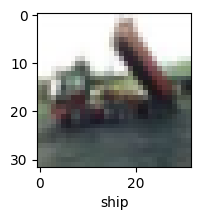

In [36]:
plot_sample(x_test, y_test, 2)

In [37]:
y_pred = cnn.predict(x_test)
y_pred[:5]

313/313 [==============================] - 1s 2ms/step


array([[5.09281689e-03, 6.84126571e-05, 1.23877195e-03, 9.18700337e-01,
        3.83268285e-04, 6.32171929e-02, 1.22125936e-03, 2.77515410e-05,
        1.00228395e-02, 2.73562564e-05],
       [6.38189260e-04, 1.19153867e-02, 7.80409027e-06, 7.49153685e-07,
        7.00976921e-09, 4.56723122e-08, 9.47752632e-09, 1.11125429e-08,
        9.87333894e-01, 1.03892919e-04],
       [9.12385285e-02, 1.61192909e-01, 6.79904688e-03, 9.15101543e-03,
        1.81630068e-03, 1.47684256e-03, 7.94708671e-04, 2.72273808e-03,
        6.90203726e-01, 3.46041545e-02],
       [1.65950805e-01, 2.86502996e-03, 5.38541470e-03, 5.33947255e-04,
        6.04365887e-05, 3.46187926e-06, 6.12643416e-05, 5.71176906e-06,
        8.25056314e-01, 7.76702364e-05],
       [1.53850715e-06, 6.90456291e-05, 1.76968798e-02, 1.38096720e-01,
        5.96039951e-01, 3.37354764e-02, 2.13387534e-01, 1.20518359e-06,
        9.71460948e-04, 2.28592327e-07]], dtype=float32)

In [38]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 8, 8, 4]

In [39]:
y_test[:5]

array([3, 8, 8, 0, 6], dtype=uint8)

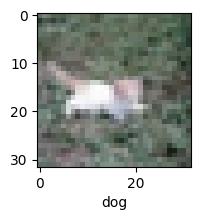

In [42]:
plot_sample(x_test, y_test, 39)

In [43]:
classes[y_classes[39]]

'dog'

In [44]:
print('Classification Report: \n', classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.67      0.81      0.73      1000
           1       0.79      0.84      0.81      1000
           2       0.74      0.47      0.57      1000
           3       0.43      0.65      0.52      1000
           4       0.67      0.59      0.63      1000
           5       0.63      0.52      0.57      1000
           6       0.84      0.70      0.76      1000
           7       0.74      0.75      0.74      1000
           8       0.79      0.81      0.80      1000
           9       0.78      0.79      0.78      1000

    accuracy                           0.69     10000
   macro avg       0.71      0.69      0.69     10000
weighted avg       0.71      0.69      0.69     10000

